# Approximate Quadratic Function With TensorFlow

Modified from https://github.com/vahidk/EffectiveTensorflow

In [1]:
import numpy as np
import tensorflow as tf
#Remeber to install matplotlib in your environment
import matplotlib.pyplot as plt

In [2]:
#When using Jupyter notebook make sure to call tf.reset_default_graph() 
# at the beginning to clear the symbolic graph before defining new nodes.
tf.reset_default_graph()

In [3]:
# Placeholders are used to feed values from python to TensorFlow ops. We define
# two placeholders, one for input feature x, and one for output y.
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [4]:
# Assuming we know that the desired function is a polynomial of 2nd degree, we
# allocate a vector of size 3 to hold the coefficients. The variable will be
# automatically initialized with random noise.
w = tf.get_variable("w", shape=[3, 1])

In [5]:
# We define yhat to be our estimate of y.
f = tf.stack([tf.square(x), x, tf.ones_like(x)], 1)
yhat = tf.squeeze(tf.matmul(f, w), 1)

In [6]:
# The loss is defined to be the l2 distance between our estimate of y and its
# true value. We also added a shrinkage term, to ensure the resulting weights
# would be small.
loss = tf.nn.l2_loss(yhat - y)

In [7]:
# We use the Adam optimizer with learning rate set to 0.1 to minimize the loss.
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [8]:
def generate_data(size = 100):
    x_val = np.random.uniform(-10.0, 10.0, size=size)
    y_val = 5 * np.square(x_val) + 14.3 * x_val + 8.9
    return x_val, y_val

In [9]:
inspect_step = [0,1000,5000,10000,15000,20000]
inspect_list = list()

In [10]:
sess = tf.Session()
# Since we are using variables we first need to initialize them.
sess.run(tf.global_variables_initializer())
for step in range(20001):
    x_val, y_val = generate_data()
    _, loss_val = sess.run([train_op, loss], {x: x_val, y: y_val})
    if step in inspect_step:
        print('STEP {:5d}: loss_val {:}'.format(step,loss_val))
        inspect_data = dict()
        inspect_data['w'] = w.eval(sess)
        inspect_data['step'] = step
        inspect_list.append(inspect_data)

STEP     0: loss_val 2060689.375
STEP  1000: loss_val 1881029.25
STEP  5000: loss_val 201219.46875
STEP 10000: loss_val 47986.7421875
STEP 15000: loss_val 4134.412109375
STEP 20000: loss_val 0.029617290943861008


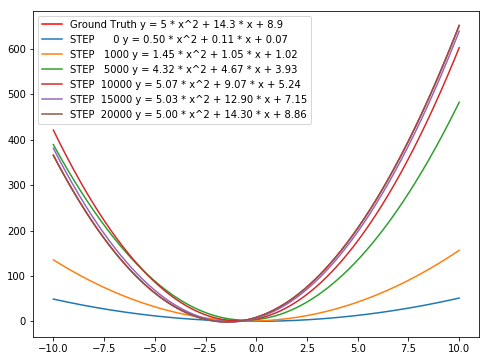

In [11]:
plt.figure(figsize=(8,6))

x_axis = np.arange(-10.0,10.0,0.0001)
y_gt = 5.0 * np.square(x_axis) + 14.3 * x_axis + 8.9
plt.plot(x_axis,y_gt,color='r',label='Ground Truth y = 5 * x^2 + 14.3 * x + 8.9')
for data in inspect_list:
    yhat = data['w'][0][0] * np.square(x_axis) + data['w'][1][0] * x_axis + data['w'][2][0]
    plt.plot(x_axis,yhat,label='STEP  {:5d} y = {:.2f} * x^2 + {:.2f} * x + {:.2f}'.format(
        data['step'],data['w'][0][0],data['w'][1][0],data['w'][2][0]))
#plt.xlim([-10.0,10.0])
plt.legend()
plt.show()